# Projeto 2 - Regressão usando Scikit Learn

A ideia desse projeto é iniciar no mundo de machine learning, com separação de bases, avaliação de métricas, uso de cross validation e, finalmente, criação e comparação de modelos preditivos utilizando a biblioteca scikit learn. O projeto foi proposto no curso "Jornada Cientista de Dados" do Let's Data

## Objeto de estudo
Base de dados com informações de planos de saúde, utilizado no livro "Machine Learning with R" de Brett Lantz, disponível em https://github.com/stedy/Machine-Learning-with-R-datasets.

Problema: Prever os gastos com plano de saúde de acordo com as características do segurado. Poderia ser um problema interessante tanto para os segurados quanto para as seguradoras.

In [1]:
#!pip install sklearn seaborn

In [2]:
# importando blbiotecas
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Configurando pandas para nao mostrar notação cientifica para numeros
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [3]:
#Ler dados do seguro
df_seguro = pd.read_csv('./data/insurance.csv')
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
#Avaliando a quantidade de linhas e colunas
df_seguro.shape

(1338, 7)

In [5]:
#Avaliando os tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Estatística descritiva
Conhecer as medidas estatisticas, de tendencia central, dispersão, separatrizes, distribuições é essencial para conhecermos melhor os dados em que estamos trabalhando.

In [7]:
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<Axes: xlabel='age', ylabel='Count'>

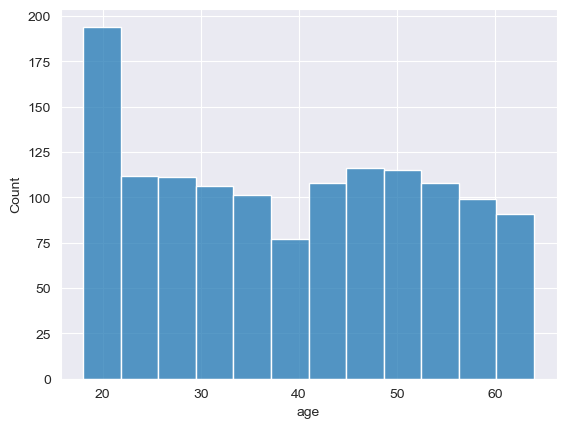

In [8]:
#Analisando a distribuição das idades
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='age')

<Axes: xlabel='bmi', ylabel='Count'>

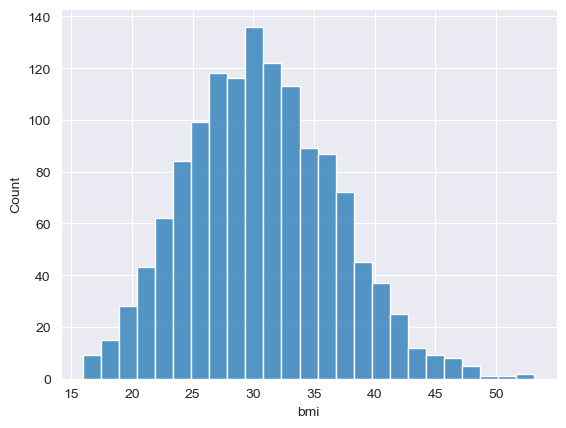

In [9]:
#Analisando a distribuição do IMC
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='bmi')


<Axes: xlabel='children', ylabel='count'>

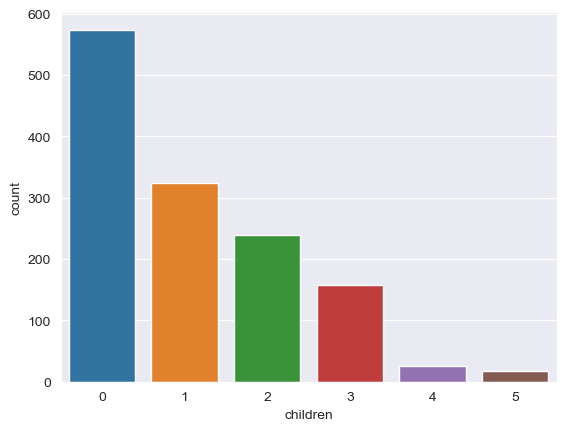

In [10]:
#Analisando a quantidade de crianças
sns.set_style("darkgrid")
plt.tight_layout()

sns.countplot(data=df_seguro, x='children')

<Axes: xlabel='charges', ylabel='Count'>

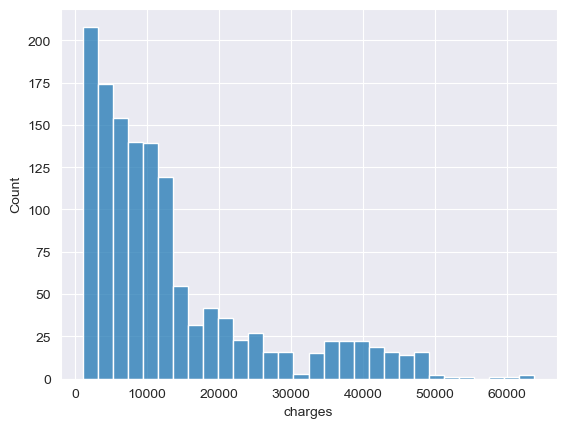

In [11]:
#Analisando a variavel target: valor do seguro

sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_seguro, x='charges')

## Relação entre as features e a variavel target
Vamos analisar as dispersões das variaveis preditoras com o valor do seguro


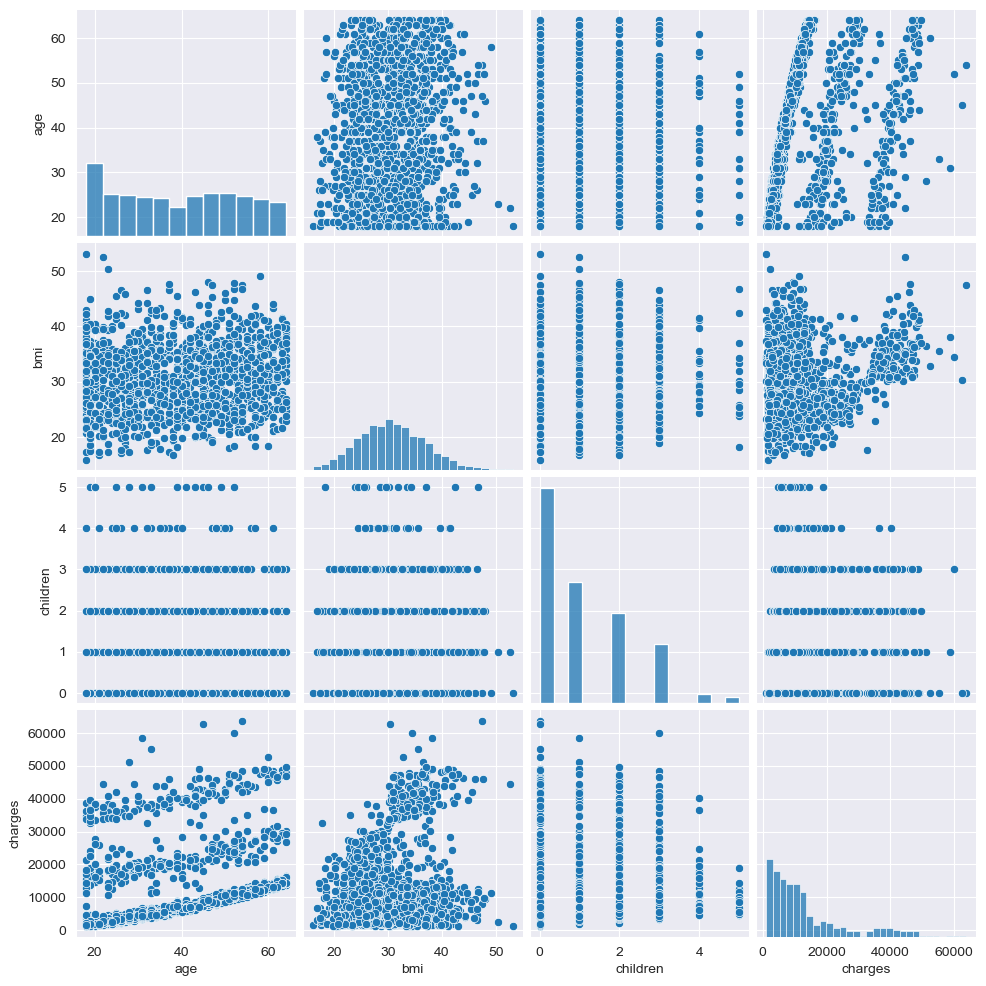

In [12]:
#Pairplot faz graficos de dispersão para os pares de variaveis
sns.pairplot(data = df_seguro)

 Fica evidente uma correlação positiva entre as idades e as cobranças de planos de saude

## Codificação de variáveis categóricas

In [13]:
#Como somente temos variaveis nominais, vamos utilizar One Hot Encoder
#Podemos utilizar o get_dummies do pandas, ou o OneHotEncoder do scikit learn
#Para variaveis somente com duas classes(sex e smoker), podemos fazer um mapeamento

df_seguro['female'] = df_seguro['sex'].map({'female':1, 'male': 0})
df_seguro['smoker'] = df_seguro['smoker'].map({'yes':1, 'no': 0})
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges,female
0,19,female,27.90,0,1,southwest,16884.92,1
1,18,male,33.77,1,0,southeast,1725.55,0
2,28,male,33.00,3,0,southeast,4449.46,0
3,33,male,22.70,0,0,northwest,21984.47,0
4,32,male,28.88,0,0,northwest,3866.86,0


In [14]:
df_seguro = df_seguro.drop('sex', axis=1)
df_seguro.head()

,age,bmi,children,smoker,region,charges,female
0,19,27.90,0,1,southwest,16884.92,1
1,18,33.77,1,0,southeast,1725.55,0
2,28,33.00,3,0,southeast,4449.46,0
3,33,22.70,0,0,northwest,21984.47,0
4,32,28.88,0,0,northwest,3866.86,0


In [15]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
#Para as regioes vamos usar o OHE
colunas_regiao = pd.get_dummies(df_seguro['region'], drop_first = True)
colunas_regiao.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [17]:
#axis = 1 junta colunas, axis = 0 junta linhas
pd.concat([df_seguro, colunas_regiao], axis = 1).head()

,age,bmi,children,smoker,region,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,southwest,16884.92,1,0,0,1
1,18,33.77,1,0,southeast,1725.55,0,0,1,0
2,28,33.00,3,0,southeast,4449.46,0,0,1,0
3,33,22.70,0,0,northwest,21984.47,0,1,0,0
4,32,28.88,0,0,northwest,3866.86,0,1,0,0


In [18]:
df_seguro = pd.concat([df_seguro, colunas_regiao], axis = 1)
df_seguro = df_seguro.drop('region', axis = 1)
df_seguro.head()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
0,19,27.90,0,1,16884.92,1,0,0,1
1,18,33.77,1,0,1725.55,0,0,1,0
2,28,33.00,3,0,4449.46,0,0,1,0
3,33,22.70,0,0,21984.47,0,1,0,0
4,32,28.88,0,0,3866.86,0,1,0,0


## Determinando quem são as variáveis preditoras e a variavel target

In [19]:
X = df_seguro.drop('charges', axis = 1)
y = df_seguro[['charges']]

In [20]:
X.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
0,19,27.90,0,1,1,0,0,1
1,18,33.77,1,0,0,0,1,0
2,28,33.00,3,0,0,0,1,0
3,33,22.70,0,0,0,1,0,0
4,32,28.88,0,0,0,1,0,0


In [21]:
y.head()

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


# Separação de bases

In [22]:
#A função que separa base em treino e teste

from sklearn.model_selection import train_test_split

#Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino, y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

#Vamos ver quantas linhas de treino e teste temos
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape


((1070, 8), (268, 8), (1070, 1), (268, 1))

## Feature scaling

Como estamos utilizando um modelo linear, é importante realizar o scaling das features para mantê-las numa mesma escala de grandeza. Vamos usar o MinMaxScaler

In [23]:
df_seguro.describe()

,age,bmi,children,smoker,charges,female,northwest,southeast,southwest
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,0.20,13270.42,0.49,0.24,0.27,0.24
std,14.05,6.10,1.21,0.40,12110.01,0.50,0.43,0.45,0.43
min,18.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00,0.00
25%,27.00,26.30,0.00,0.00,4740.29,0.00,0.00,0.00,0.00
50%,39.00,30.40,1.00,0.00,9382.03,0.00,0.00,0.00,0.00
75%,51.00,34.69,2.00,0.00,16639.91,1.00,0.00,1.00,0.00
max,64.00,53.13,5.00,1.00,63770.43,1.00,1.00,1.00,1.00


In [24]:
#Normalização - MinMaxScaler, Padronização - StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [25]:
colunas = X_treino.columns

#Parte importante: Fit no treuno, transform no treino e teste
X_treino[colunas] = scaler.fit_transform(X_treino)
X_teste[colunas] = scaler.transform(X_teste)

X_treino.shape, X_teste.shape


((1070, 8), (268, 8))

In [26]:
X_treino.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
560,0.61,0.11,0.40,0.00,1.00,1.00,0.00,0.00
1285,0.63,0.22,0.00,0.00,1.00,0.00,0.00,0.00
1142,0.74,0.24,0.00,0.00,1.00,0.00,1.00,0.00
969,0.46,0.49,1.00,0.00,1.00,0.00,1.00,0.00
486,0.78,0.15,0.60,0.00,1.00,1.00,0.00,0.00


In [27]:
X_teste.head()

,age,bmi,children,smoker,female,northwest,southeast,southwest
764,0.59,0.25,0.40,0.00,1.00,0.00,0.00,0.00
887,0.39,0.38,0.00,0.00,1.00,1.00,0.00,0.00
890,1.00,0.29,0.00,1.00,1.00,1.00,0.00,0.00
1293,0.61,0.26,0.60,0.00,0.00,1.00,0.00,0.00
259,0.02,0.43,0.00,1.00,0.00,1.00,0.00,0.00


In [28]:
X_treino.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.39,0.22,0.21,0.49,0.24,0.26,0.25
std,0.31,0.16,0.24,0.40,0.50,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.38,0.20,0.00,0.00,0.00,0.00,0.00
75%,0.72,0.50,0.40,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [29]:
X_teste.describe()

,age,bmi,children,smoker,female,northwest,southeast,southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.45,0.41,0.21,0.20,0.52,0.26,0.30,0.23
std,0.30,0.17,0.23,0.40,0.50,0.44,0.46,0.42
min,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.29,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.43,0.40,0.20,0.00,1.00,0.00,0.00,0.00
75%,0.70,0.52,0.40,0.00,1.00,1.00,1.00,0.00
max,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.00


# Analisando a correlação entre as variáveis

Quando utilizamos modelos lineares, é importante saber se as variáveis preditoras guardam alguma colinearidade. Caso ocorra, devemos remover uma das variáveis para que o modelo nao seja afetado


<Axes: >

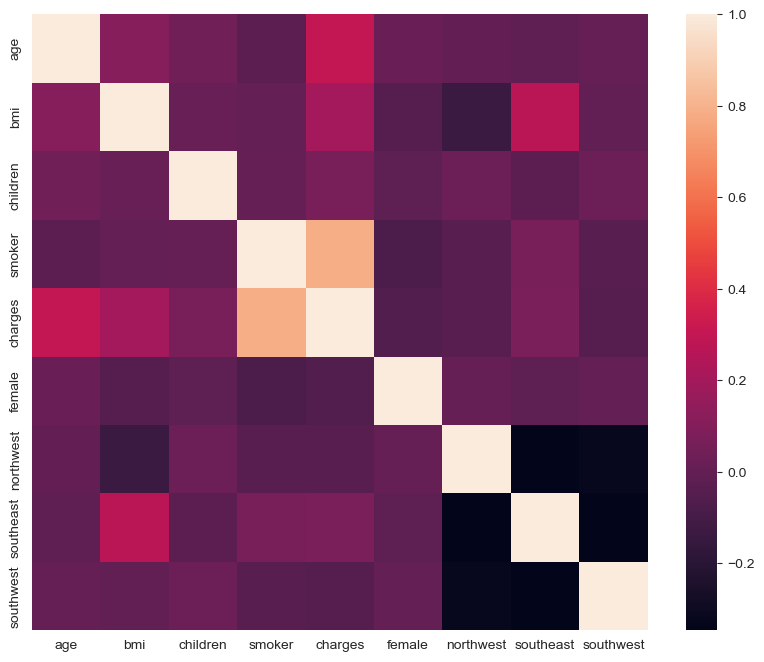

In [30]:
figura, graficos = plt.subplots(figsize=(10,8))
corr = df_seguro.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), square=True, ax=graficos)

# Analisando se existem dados faltantes

In [31]:
# isnull busca quem é nulo (dados faltantes)
df_seguro.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
female       0
northwest    0
southeast    0
southwest    0
dtype: int64

## Machine Learning

Primeiro modelo que vamos utilizar é a regressão linear. Lembrando que vamos utilizar o cross validation para evitar overfit e ter uma base de comparação para outros modelos

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [33]:
#Criando o modelo (ou estimador, algoritmo)
regressao_linear = LinearRegression()

#Treinar utilizando cross validation

valores_rmse_rl = cross_val_score(estimator = regressao_linear,
                                  X=X_treino,
                                  y=y_treino,
                                  cv=10, #10-fold CV
                                  scoring='neg_root_mean_squared_error')


valores_rmse_rl

array([-6073.99997254, -6580.87166754, -5233.82683473, -6045.25239632,
       -5836.4647871 , -6127.43525895, -7281.08373608, -6321.52706355,
       -6193.3145481 , -5637.06299714])

In [34]:
valores_rmse_rl = valores_rmse_rl *-1
valores_rmse_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

In [35]:
media_rmse_rl = valores_rmse_rl.mean()
media_rmse_rl

6133.0839262055

## Árvore de regressão

In [36]:
from sklearn.tree import DecisionTreeRegressor

arvore_regressao = DecisionTreeRegressor()

#cross validation
valores_rmse_arvore = cross_val_score(estimator = arvore_regressao,
                                  X=X_treino,
                                  y=y_treino,
                                  cv=10, #10-fold CV
                                  scoring='neg_root_mean_squared_error')


valores_rmse_arvore

array([-6562.79000504, -7476.61681872, -6670.95448205, -7240.25309282,
       -7240.63753143, -6146.9766586 , -7183.84795052, -6478.22207532,
       -6643.70781037, -6395.06508693])

In [37]:
valores_rmse_arvore = valores_rmse_arvore *-1
valores_rmse_arvore

array([6562.79000504, 7476.61681872, 6670.95448205, 7240.25309282,
       7240.63753143, 6146.9766586 , 7183.84795052, 6478.22207532,
       6643.70781037, 6395.06508693])

In [38]:
media_rmse_arvore = valores_rmse_arvore.mean()
media_rmse_arvore

6803.907151179503

# Removendo as colunas de região, que nao mostraram muita influência na variável target

In [39]:
X_treino.columns

Index(['age', 'bmi', 'children', 'smoker', 'female', 'northwest', 'southeast',
       'southwest'],
      dtype='object')

In [40]:
colunas_regiao=['northwest', 'southeast', 'southwest']

valores_rmse_rl_sem_regiao = cross_val_score(estimator = regressao_linear,
                                  X=X_treino.drop(colunas_regiao, axis=1),
                                  y=y_treino,
                                  cv=10, #10-fold CV
                                  scoring='neg_root_mean_squared_error')


valores_rmse_rl_sem_regiao.mean()*-1

6121.545062597131

In [41]:
valores_rmse_rl_sem_regiao=valores_rmse_rl_sem_regiao*-1

In [42]:
#cross validation
valores_rmse_arvore_sem_regiao = cross_val_score(estimator = arvore_regressao,
                                  X=X_treino.drop(colunas_regiao, axis=1),
                                  y=y_treino,
                                  cv=10, #10-fold CV
                                  scoring='neg_root_mean_squared_error')


valores_rmse_arvore_sem_regiao.mean()*-1

6926.17002604244

In [43]:
valores_rmse_arvore_sem_regiao = valores_rmse_arvore_sem_regiao*-1

# Modelo campeão
O melhor modelo foi a regressão linear com a retirada das colunas de região

In [44]:
regressao_linear.fit(X_treino.drop(colunas_regiao, axis = 1), y_treino)

LinearRegression()

In [45]:
regressao_linear.coef_

array([[1.18251723e+04, 1.21744207e+04, 2.13627215e+03, 2.36539033e+04,
        7.95178837e+00]])

In [46]:
df_coeficientes = pd.DataFrame(regressao_linear.coef_)
df_coeficientes.columns = regressao_linear.feature_names_in_
df_coeficientes

,age,bmi,children,smoker,female
0,11825.17,12174.42,2136.27,23653.90,7.95


In [48]:
!pip install statsmodels

In [51]:
#Extra: Calculo do p-valor dos coeficientes de cada regressao
import statsmodels.api as sm
rl_statsmodel = sm.OLS(y_treino, X_treino.drop(colunas_regiao, axis=1))
resultado_fit = rl_statsmodel.fit()
p_valores = resultado_fit.summary2().tables[1]['P>|t|']
p_valores


age        0.00
bmi        0.00
children   0.07
smoker     0.00
female     0.21
Name: P>|t|, dtype: float64

Os coeficientes para crianças e sexo nao sao estatisticamente validos, devemos ter cautela ao analisa o impacto nos valores do plano de saude. Mas idade, IMC e se a pessoa fuma ou não são estatisticamente válidos

# Finalmente
Agora que temos o modelo final, podemos fazer inferências dos valores do plano de saude no teste.

In [52]:
#Ver estimadores scikit learn
#estimador é treinado com fit
#estimador prediz com predict

precos_preditos = regressao_linear.predict(X_teste.drop(colunas_regiao, axis=1))
precos_preditos[:5]

array([[ 8554.81711589],
       [ 6973.58746745],
       [36798.60416104],
       [ 9417.88282303],
       [26871.68031081]])

In [53]:
len(precos_preditos)

268

In [54]:
y_teste.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [57]:
predicoes_vs_real = pd.DataFrame({'predicao':precos_preditos.flatten(), 'real':y_teste.values.flatten()})
predicoes_vs_real['diferenca_abs']=abs(predicoes_vs_real['predicao']-predicoes_vs_real['real'])
predicoes_vs_real.head(20)

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
5,11097.38,4536.26,6561.12
6,145.28,2117.34,1972.06
7,16746.17,14210.54,2535.63
8,747.53,3732.63,2985.09
9,11153.68,10264.44,889.23


In [59]:
# Sera que o meu modelo é melhor que a media? Testando o r quadrado. Quanto mais proximo a 1, melhor

from sklearn.metrics import r2_score

r2_score(y_true=y_teste, y_pred=precos_preditos)

0.7811302113434095

# Testando a predicao com os inputs

In [60]:
idade = input()

20


In [61]:
indice_massa_corporal = input()

35


In [62]:
criancas = input()

1


In [63]:
fumante = input('1 para fuimante, 0 para nao fumantes')

1 para fuimante, 0 para nao fumantes1


In [64]:
sexo = input('1 para mulher, 0 para homem')

1 para mulher, 0 para homem0


In [65]:
#Realizando o scaling das features
features = [[idade, indice_massa_corporal, criancas, fumante, sexo, 1, 1, 1]]

features = scaler.transform(features)
features


C:\Users\horiu\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ,
        1.        , 1.        , 1.        ]])

In [66]:
#Pegando somente as 5 features(removendo regiao)
features = features[:, :-3]
features

array([[0.04347826, 0.51224105, 0.2       , 1.        , 0.        ]])

In [67]:
#Resultado da predicao
regressao_linear.predict(features)

C:\Users\horiu\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[28564.80692529]])